In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [3]:
soil=pd.read_csv('soil.csv')

In [5]:
soil.head()

,Year,Month,Day,atmpressure,Humidity,Precipitation,Temperature,ph,Rainfall,soilmoisture
0,2019,5,1,1009,27,0.0,41,6.502985,1,5.8
1,2019,5,2,1008,29,0.0,38,7.038096,1,6.0
2,2019,5,3,1011,61,5.0,34,7.840207,1,8.0
3,2019,5,4,1011,69,0.0,38,6.980401,1,6.0
4,2019,5,5,1010,50,0.0,41,7.628473,1,5.8


In [6]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           61 non-null     int64  
 1   Month          61 non-null     int64  
 2   Day            61 non-null     int64  
 3   atmpressure    61 non-null     int64  
 4   Humidity       61 non-null     int64  
 5   Precipitation  61 non-null     float64
 6   Temperature    61 non-null     int64  
 7   ph             61 non-null     float64
 8   Rainfall       61 non-null     int64  
 9   soilmoisture   61 non-null     float64
dtypes: float64(3), int64(7)
memory usage: 4.9 KB


In [7]:
soil.describe()

,Year,Month,Day,atmpressure,Humidity,Precipitation,Temperature,ph,Rainfall,soilmoisture
count,61.0,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2019.0,5.491803,15.754098,1005.721311,55.213115,0.444262,40.639344,6.627903,0.573770,5.680328
std,0.0,0.504082,8.880045,2.702660,19.516758,1.238753,3.219901,0.681350,0.498632,1.092370
min,2019.0,5.000000,1.000000,1001.000000,27.000000,0.000000,31.000000,5.070176,0.000000,4.000000
25%,2019.0,5.000000,8.000000,1004.000000,42.000000,0.000000,40.000000,6.254030,0.000000,5.200000
50%,2019.0,5.000000,16.000000,1005.000000,51.000000,0.000000,41.000000,6.523490,1.000000,5.800000
75%,2019.0,6.000000,23.000000,1008.000000,66.000000,0.000000,42.000000,7.070960,1.000000,6.000000
max,2019.0,6.000000,31.000000,1011.000000,100.000000,6.000000,46.000000,7.965210,1.000000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020CBBD4DF08>,
      dtype=object)

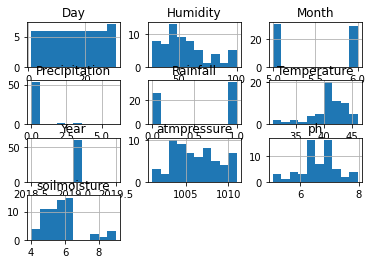

In [8]:
soil.hist()

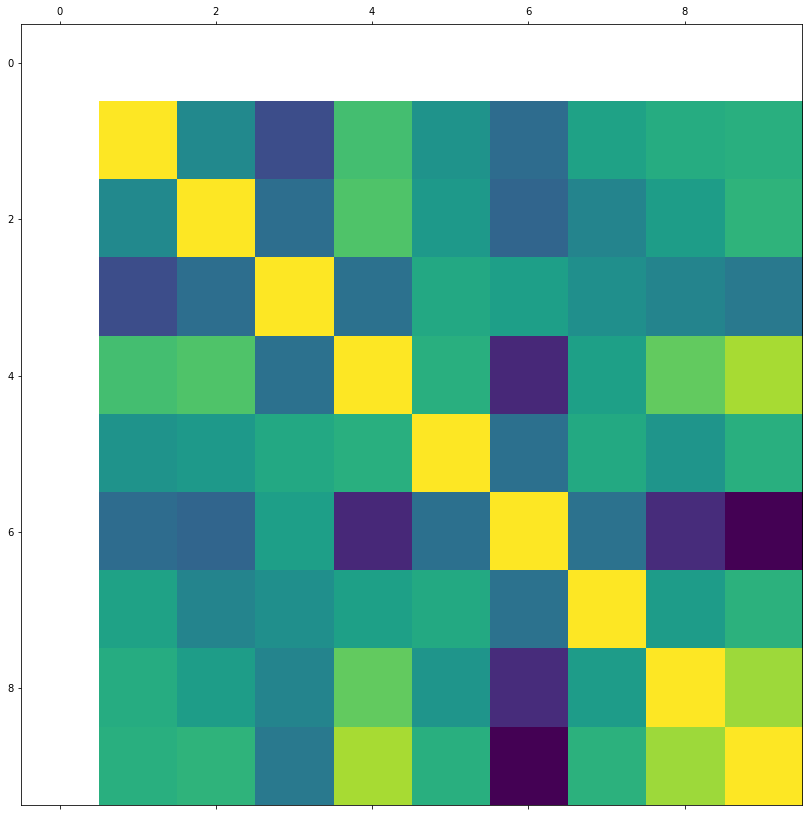

In [9]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(soil.corr())

Text(0.5, 1.0, 'Count of each Rainfall Class')

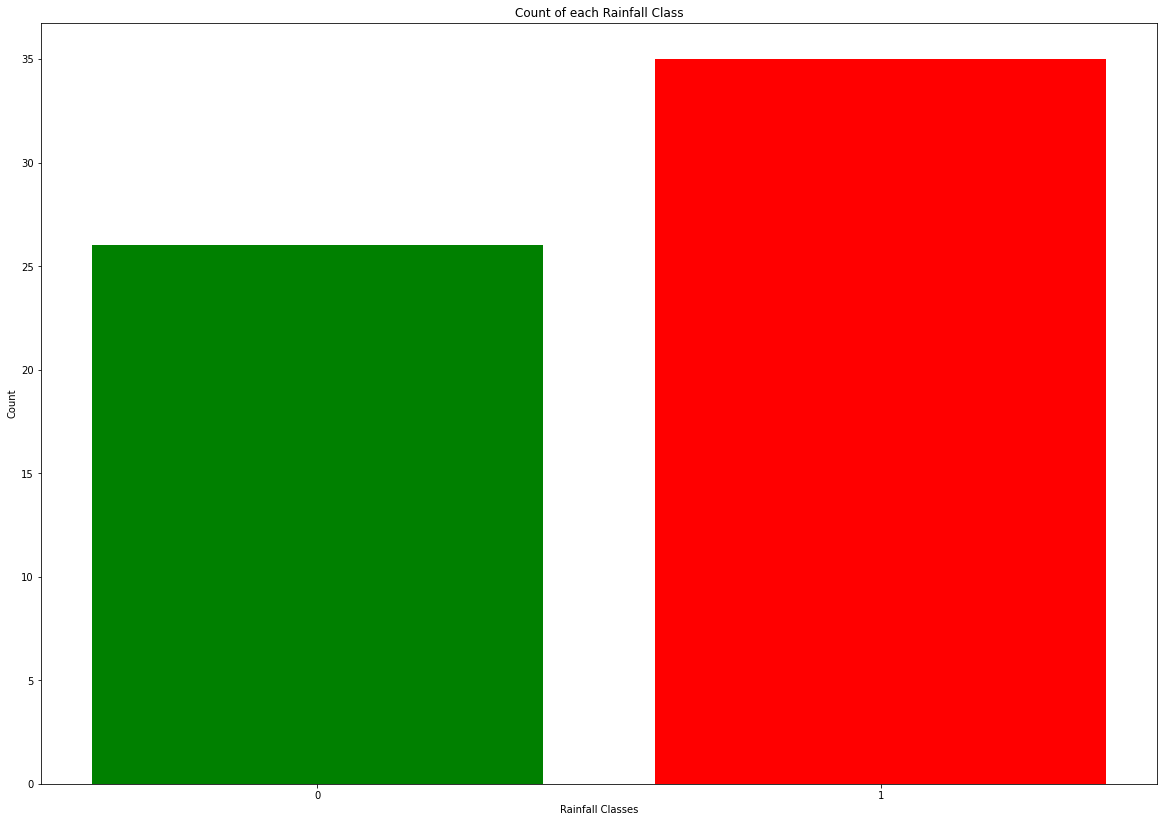

In [10]:
rcParams['figure.figsize'] = 20, 14
plt.bar(soil['Rainfall'].unique(), soil['Rainfall'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Rainfall Classes')
plt.ylabel('Count')
plt.title('Count of each Rainfall Class')

In [11]:
columns=['Year','Month','Day','atm pressure','Humidity','Precipitation','Temperature','ph','Rainfall','soilmoisture']

In [12]:
soil.columns

Index(['Year', 'Month', 'Day', 'atmpressure', 'Humidity', 'Precipitation',
       'Temperature', 'ph', 'Rainfall', 'soilmoisture'],
      dtype='object')

In [13]:
x=soil.drop(columns=['Rainfall','Year','Month','Day'])

In [14]:
x

,atmpressure,Humidity,Precipitation,Temperature,ph,soilmoisture
0,1009,27,0.0,41,6.502985,5.8
1,1008,29,0.0,38,7.038096,6.0
2,1011,61,5.0,34,7.840207,8.0
3,1011,69,0.0,38,6.980401,6.0
4,1010,50,0.0,41,7.628473,5.8
...,...,...,...,...,...,...
56,1005,62,4.0,42,7.070960,5.2
57,1003,100,0.0,33,6.325890,8.5
58,1003,100,0.0,31,6.502760,9.0
59,1001,100,0.0,31,7.965210,9.0


In [15]:
y=soil['Rainfall']

In [16]:
y

0     1
1     1
2     1
3     1
4     1
     ..
56    0
57    1
58    1
59    1
60    1
Name: Rainfall, Length: 61, dtype: int64